# **1. Import Library**

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# **2. Import Dataset**

In [121]:
# Import dataset into new dataframe named data_train
data_train = pd.read_csv("kendaraan_train.csv")
data_train.head()z

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


# **3. Do pre-processing for dataset**

**Check NaN data**

In [122]:
# Check NaN data
data_train.isna()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,False,False,False,False,False,False,False,False,False,False,False,False
285827,False,False,False,False,False,False,False,False,False,False,False,False
285828,False,False,False,False,False,False,False,False,False,False,False,False
285829,False,False,False,False,False,False,False,False,False,False,False,False


In [123]:
# Drop NaN data
data_train = data_train.dropna()
data_train

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
5,6,Pria,21.0,1.0,35.0,1.0,< 1 Tahun,Tidak,22735.0,152.0,171.0,0
8,9,Wanita,20.0,1.0,8.0,1.0,< 1 Tahun,Tidak,30786.0,160.0,31.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


**Duplicated data**

In [124]:
# Check duplicate data
print("Duplicated data:",data_train.duplicated().sum())

Duplicated data: 0


**Change categorical into numeric data**

In [125]:
# Categorical -> Numeric data
data_train['Jenis_Kelamin'] = data_train['Jenis_Kelamin'].map({'Pria':0, 'Wanita':1})
data_train['Kendaraan_Rusak'] = data_train['Kendaraan_Rusak'].map({'Tidak':0, 'Pernah':1})
data_train['Umur_Kendaraan'] = data_train['Umur_Kendaraan'].map({'< 1 Tahun':0, '1-2 Tahun':1, '> 2 Tahun':2})
data_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,1,30.0,1.0,33.0,1.0,0,0,28029.0,152.0,97.0,0
1,2,0,48.0,1.0,39.0,0.0,2,1,25800.0,29.0,158.0,0
3,4,1,58.0,1.0,48.0,0.0,1,0,2630.0,124.0,63.0,0
5,6,0,21.0,1.0,35.0,1.0,0,0,22735.0,152.0,171.0,0
8,9,1,20.0,1.0,8.0,1.0,0,0,30786.0,160.0,31.0,0


**Drop unnecessary data**

In [126]:
# Drop unnecessary data
del data_train['id']
del data_train['Tertarik']
data_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1,30.0,1.0,33.0,1.0,0,0,28029.0,152.0,97.0
1,0,48.0,1.0,39.0,0.0,2,1,25800.0,29.0,158.0
3,1,58.0,1.0,48.0,0.0,1,0,2630.0,124.0,63.0
5,0,21.0,1.0,35.0,1.0,0,0,22735.0,152.0,171.0
8,1,20.0,1.0,8.0,1.0,0,0,30786.0,160.0,31.0


**Check outliers**

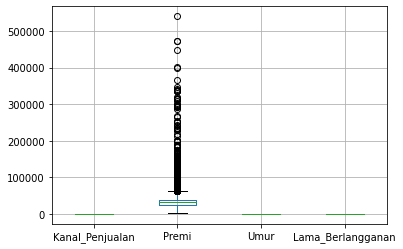

In [127]:
data_train[['Kanal_Penjualan', 'Premi', 'Umur', 'Lama_Berlangganan']].boxplot()

In [128]:
z = np.abs(stats.zscore(data_train[['Kanal_Penjualan', 'Premi', 'Umur', 'Lama_Berlangganan']]))
threshold = 3

data_new = data_train[(z < threshold).all(axis=1)]
data_new

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1,30.0,1.0,33.0,1.0,0,0,28029.0,152.0,97.0
1,0,48.0,1.0,39.0,0.0,2,1,25800.0,29.0,158.0
3,1,58.0,1.0,48.0,0.0,1,0,2630.0,124.0,63.0
5,0,21.0,1.0,35.0,1.0,0,0,22735.0,152.0,171.0
8,1,20.0,1.0,8.0,1.0,0,0,30786.0,160.0,31.0
...,...,...,...,...,...,...,...,...,...,...
285826,1,23.0,1.0,4.0,1.0,0,0,25988.0,152.0,217.0
285827,1,21.0,1.0,46.0,1.0,0,0,44686.0,152.0,50.0
285828,1,23.0,1.0,50.0,1.0,0,0,49751.0,152.0,226.0
285829,0,68.0,1.0,7.0,1.0,1,0,30503.0,124.0,270.0


**Heatmap**

Text(0.5, 1.0, 'Kendaraan Train')

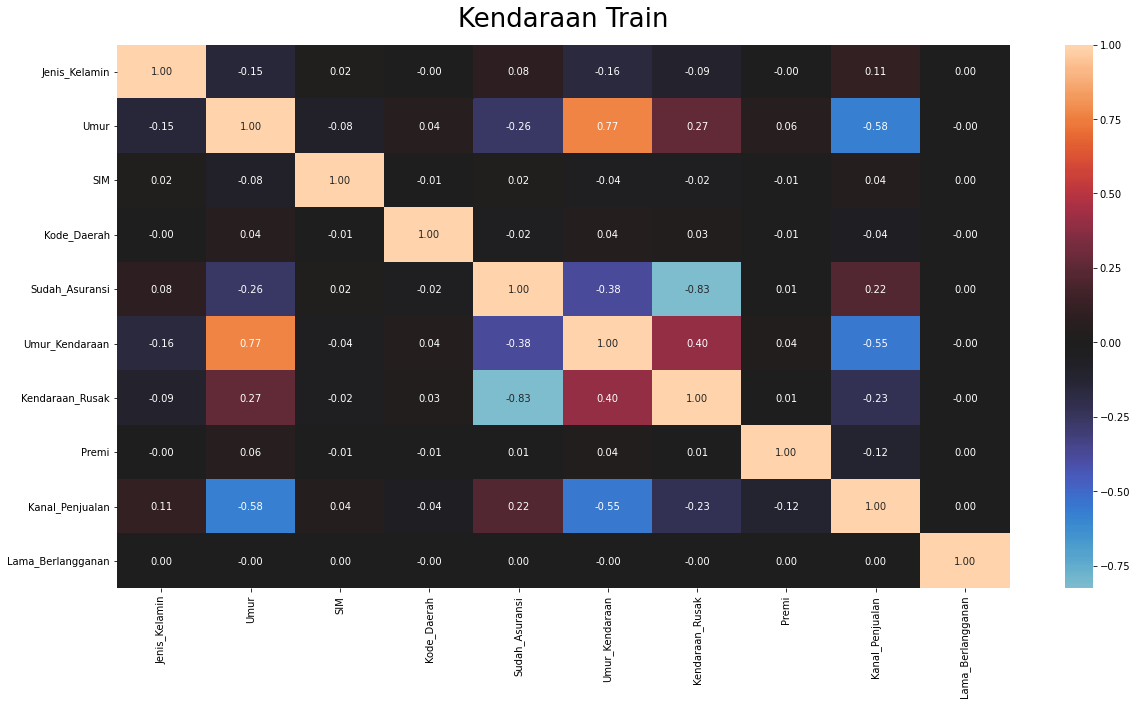

In [129]:
fig, ax = plt.subplots(figsize=(20,10))
heatmap = sns.heatmap(data_new.corr(), center=0, annot=True, fmt=".2f")
heatmap.set_title('Kendaraan Train', fontdict={'fontsize':26}, pad=18)

# **4. Clustering**

In [130]:
# Select 2 datas / columns for clustering
data_selected = data_new.loc[:, ['Premi', 'Umur']]
data_selected.head()

,Premi,Umur
0,28029.0,30.0
1,25800.0,48.0
3,2630.0,58.0
5,22735.0,21.0
8,30786.0,20.0


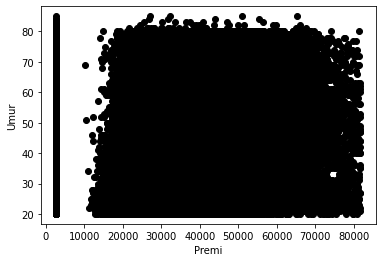

In [131]:
# Data visualization before clustering
ds_val = data_selected.values

plt.scatter(ds_val[:,0],ds_val[:,1], color='black')
plt.xlabel('Premi')
plt.ylabel('Umur')
plt.show()

In [132]:
# Define K-Means
def kMeans(ds_val, k):
  diff = 1
  cluster = np.zeros(ds_val.shape[0])
  centroids = data_selected.sample(n=k).values
  while diff:
    for i, row in enumerate(ds_val):
      distance = float('inf')
      for idx, centroid in enumerate(centroids):
        eu_distance = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
        if distance > eu_distance:
          distance = eu_distance
          cluster[i] = idx
    new_centroids = pd.DataFrame(ds_val).groupby(by=cluster).mean().values
    if np.count_nonzero(centroids-new_centroids) == 0:
      diff = 0
    else:
        centroids = new_centroids
    return centroids, cluster

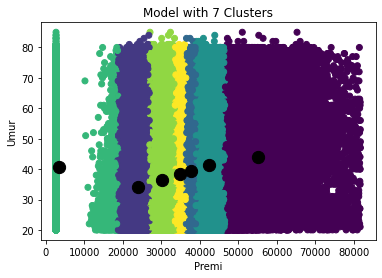

In [133]:
k = 7
centroids, cluster = kMeans(ds_val, k)
plt.scatter(ds_val[:, 0], ds_val[:, 1], c=cluster)
plt.scatter(centroids[:,0], centroids[:, 1], s=150, color='black', label='Centroids')
plt.xlabel('Premi')
plt.ylabel('Umur')
plt.title("Model with 7 Clusters")
plt.show()

# **5. Elbow Line Method & WCSS**

In [134]:
# Calculate WCSS
def calculate_cost(X, centroids, cluster):
  sum = 0
  for i, val in enumerate(X):
    sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2)
  return sum

In [135]:
# Find K value
cost_list = []
for k in range(1,10):
    centroids, cluster = kMeans(ds_val, k)
    cost = calculate_cost(ds_val, centroids, cluster)
    cost_list.append(cost)

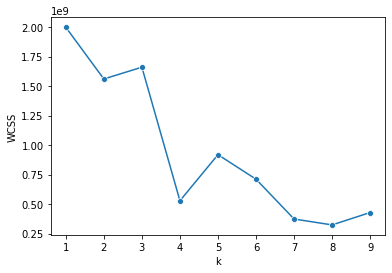

In [136]:
sns.lineplot(x=range(1,10), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

In [137]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X, cluster)
score